In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
## Returns True if the arrays representing the two partitions are adjacent by a swap and false otherwise
def is_adjacent_swap(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    if num_diff_1 != 2 and num_diff_2 != 2:
        return False
    else:
        swaps = sum(diff_part1[0] ^ diff_part2[0])
        return swaps == 2 or swaps == (dist_size*2 - 2)
            

In [3]:
def adjacent_nodes_swap(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent_swap(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [4]:
## Returns True if the arrays representing the two partitions are adjacent by a recom step
## and false otherwise
def is_adjacent_recom(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    return num_diff_1 == 2 and num_diff_2 == 2

In [5]:
def adjacent_nodes_recom(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent_recom(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [6]:
with open("enums/enum_[5,5]_[5]_5_rc.txt") as file:
    nodes_5_5={}
    for i, line in enumerate(file):
        nodes_5_5[i] = np.fromstring(line, dtype=int, sep=',')

In [8]:
edges_5_5_recom = adjacent_nodes_recom(nodes_5_5)

In [11]:
graph_5_5_recom = nx.Graph()
graph_5_5_recom.add_edges_from(edges_5_5_recom)

In [7]:
graph_5_5_recom = pickle.load(open("graph_5_5_recom.p", "rb"))

In [14]:
g_r

In [12]:
pickle.dump(graph_5_5_recom, open("graph_5_5_recom.p", "wb"))

In [5]:
edges_5_5 = adjacent_nodes(nodes_5_5)
graph_5_5 = nx.Graph()
graph_5_5.add_edges_from(edges_5_5)

In [9]:
print("# nodes:", len(graph_5_5_recom.nodes()))
print("# edges (swap):", len(g.edges()))
print("# edges (recom):", len(graph_5_5_recom.edges()))

# nodes: 4006
# edges (swap): 13416
# edges (recom): 23716


In [10]:
degrees_5_5_swap = list(map(lambda n: nx.degree(g,n), g.nodes()))
degrees_5_5_recom = list(map(lambda n: nx.degree(graph_5_5_recom,n), graph_5_5_recom.nodes()))
print("Max Degree (swap):", max(degrees_5_5_swap))
print("Min Degree (swap):", min(degrees_5_5_swap))
print("Max Degree (recom):", max(degrees_5_5_recom))
print("Min Degree (recom):", min(degrees_5_5_recom))

Max Degree (swap): 13
Min Degree (swap): 1
Max Degree (recom): 21
Min Degree (recom): 2


In [13]:
# print("Radius (swap):", nx.radius(g))
# print("Diameter (swap):", nx.diameter(g))
# print("#Centers (swap):", len(nx.center(g)))

center_5_5_recom = nx.center(graph_5_5_recom)
print("Radius (recom):", nx.radius(graph_5_5_recom))
print("Diameter (recom):", nx.diameter(graph_5_5_recom))
print("#Centers (recom):", len(center_5_5_recom))

Radius (recom): 7
Diameter (recom): 10
#Centers (recom): 878


In [14]:
nx.graph_clique_number(graph_5_5_recom)

7

In [16]:
pickle.dump(graph_5_5, open("graph_5_5_5.p", "wb"))

In [13]:
center_5_5 = nx.center(graph_5_5)

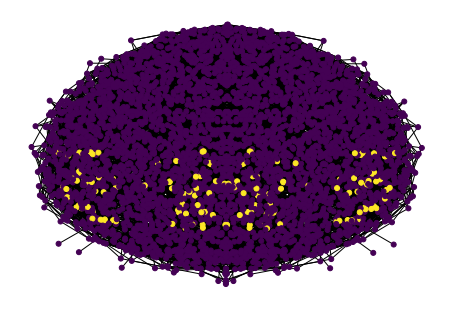

In [14]:
nx.draw_kamada_kawai(graph_5_5, node_size=25,
                     node_color=[n in center_5_5 for n in graph_5_5.nodes()])

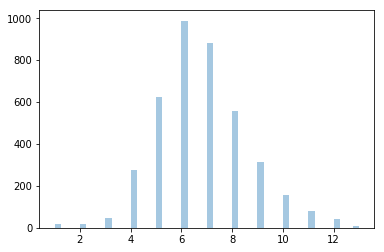

In [12]:
sns.distplot(degrees_5_5, kde=False)

In [8]:
g = pickle.load(open("graph_5_5_5.p", "rb"))

In [18]:
g